In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
import os

In [ ]:
os.chdir('..')

In [ ]:
!ls

bin	 dev   lib32   mnt			 python-apt  srv    usr
boot	 etc   lib64   NGC-DL-CONTAINER-LICENSE  root	     sys    var
content  home  libx32  opt			 run	     tmp
datalab  lib   media   proc			 sbin	     tools


# Step 2: Load the Dataset


In [ ]:
sephora_data = pd.read_csv('/content/product_info.csv')


# Step 3: Data Cleaning


In [ ]:
sephora_data.drop_duplicates(inplace=True)


#Step 4: Data Exploring 

In [ ]:
sephora_data.head(5)


,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,variation_value,...,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count,child_max_price,child_min_price
0,P473671,Fragrance Discovery Set,6342,19-69,6320,3.6364,11.0,NaN,NaN,NaN,...,1,0,0,"['Unisex/ Genderless Scent', 'Warm &Spicy Scen...",Fragrance,Value & Gift Sets,Perfume Gift Sets,0,NaN,NaN
1,P473668,La Habana Eau de Parfum,6342,19-69,3827,4.1538,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,85.0,30.0
2,P473662,Rainbow Bar Eau de Parfum,6342,19-69,3253,4.2500,16.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
3,P473660,Kasbah Eau de Parfum,6342,19-69,3018,4.4762,21.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
4,P473658,Purple Haze Eau de Parfum,6342,19-69,2691,3.2308,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0


In [ ]:
sephora_data.columns

Index(['product_id', 'product_name', 'brand_id', 'brand_name', 'loves_count',
       'rating', 'reviews', 'size', 'variation_type', 'variation_value',
       'variation_desc', 'ingredients', 'price_usd', 'value_price_usd',
       'sale_price_usd', 'limited_edition', 'new', 'online_only',
       'out_of_stock', 'sephora_exclusive', 'highlights', 'primary_category',
       'secondary_category', 'tertiary_category', 'child_count',
       'child_max_price', 'child_min_price'],
      dtype='object')

In [ ]:
sephora_data.dtypes

product_id             object
product_name           object
brand_id                int64
loves_count             int64
rating                float64
reviews               float64
price_usd             float64
highlights             object
primary_category       object
secondary_category     object
tertiary_category      object
dtype: object

In [ ]:
sephora_data.describe()

,brand_id,loves_count,rating,reviews,price_usd,value_price_usd,sale_price_usd,limited_edition,new,online_only,out_of_stock,sephora_exclusive,child_count,child_max_price,child_min_price
count,8494.000000,8.494000e+03,8216.000000,8216.000000,8494.000000,451.000000,270.000000,8494.000000,8494.000000,8494.000000,8494.000000,8494.000000,8494.000000,2754.000000,2754.000000
mean,5422.440546,2.917957e+04,4.194513,448.545521,51.655595,91.168537,20.207889,0.070285,0.071698,0.219096,0.073699,0.279374,1.631622,53.792023,39.665802
std,1709.595957,6.609212e+04,0.516694,1101.982529,53.669234,79.195631,24.327352,0.255642,0.258002,0.413658,0.261296,0.448718,5.379470,58.765894,38.685720
min,1063.000000,0.000000e+00,1.000000,1.000000,3.000000,0.000000,1.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,3.000000
25%,5333.000000,3.758000e+03,3.981725,26.000000,25.000000,45.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,19.000000
50%,6157.500000,9.880000e+03,4.289350,122.000000,35.000000,67.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,32.000000,28.000000
75%,6328.000000,2.684125e+04,4.530525,418.000000,58.000000,108.500000,25.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,59.000000,42.000000
max,8020.000000,1.401068e+06,5.000000,21281.000000,1900.000000,617.000000,320.000000,1.000000,1.000000,1.000000,1.000000,1.000000,105.000000,570.000000,400.000000


# Step 5: Product Analysis

In [ ]:
sephora_data = sephora_data[['product_id', 'product_name', 'loves_count', 'rating', 'reviews','price_usd','highlights','primary_category','secondary_category','tertiary_category']]

In [ ]:
category_counts = sephora_data['product_name'].value_counts().head(10)


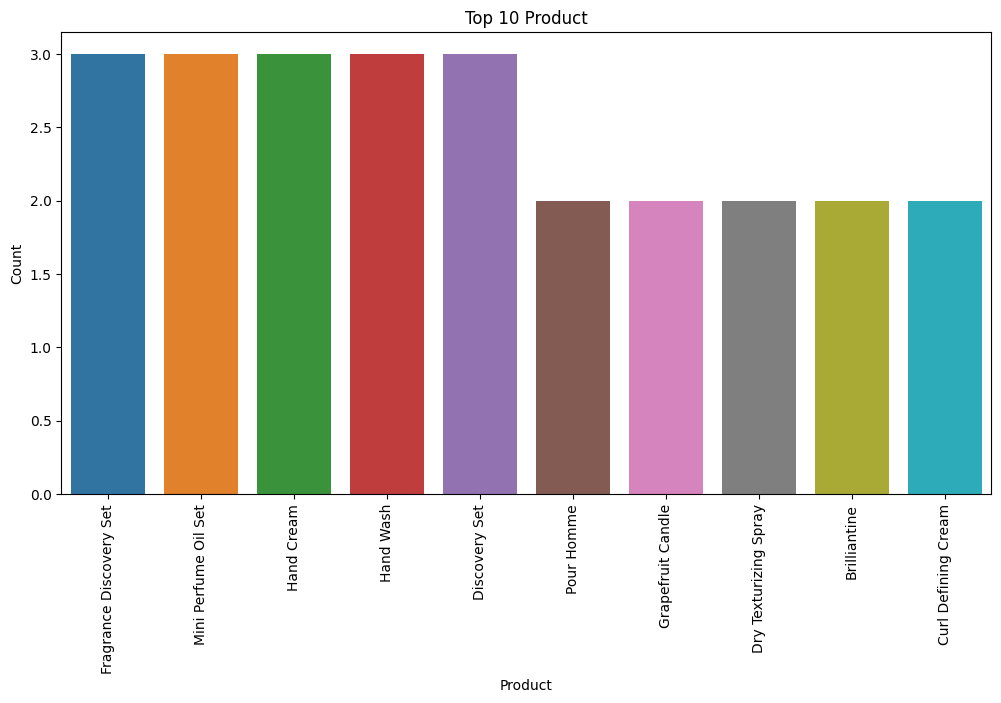

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x=category_counts.index, y=category_counts.values)
plt.xticks(rotation=90)
plt.xlabel('Product')
plt.ylabel('Count')
plt.title('Top 10 Products')
plt.show()


In [ ]:
brand_counts = sephora_data['product_id'].value_counts().head(10)


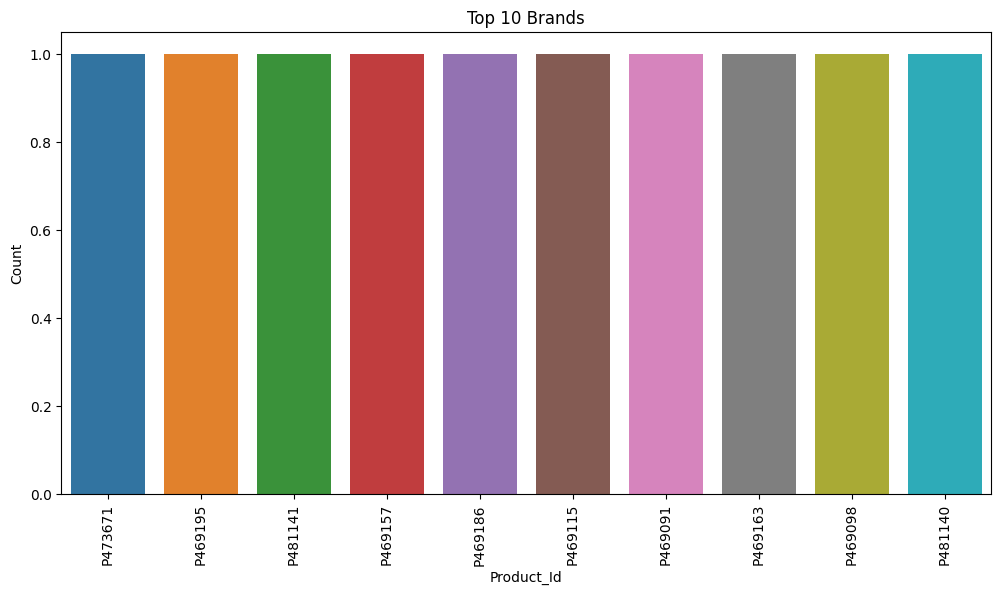

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x=brand_counts.index, y=brand_counts.values)
plt.xticks(rotation=90)
plt.xlabel('Product_Id')
plt.ylabel('Count')
plt.title('Top 10 Brands')
plt.show()


# Step 6: Pricing Analysis

<Axes: >

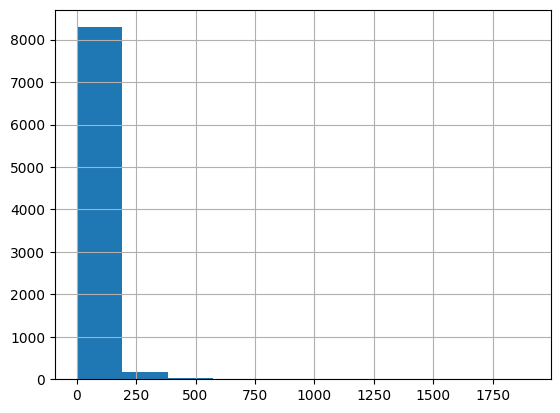

In [ ]:
sephora_data['price_usd'].hist()

<Axes: >

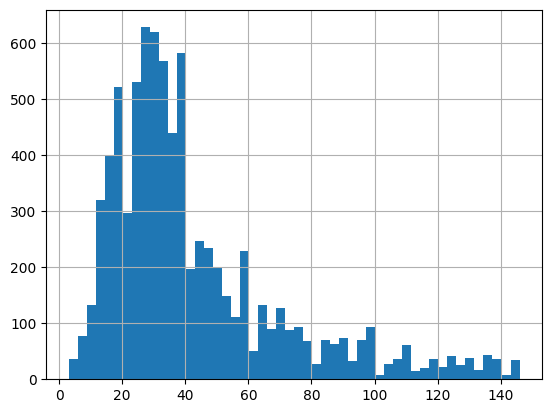

In [ ]:
sephora_data[sephora_data['price_usd']< sephora_data['price_usd'].quantile(0.95)]['price_usd'].hist(bins=50)

In [ ]:
sephora_data[sephora_data['price_usd']< sephora_data['price_usd'].quantile(0.95)].head(5)

,product_id,product_name,loves_count,rating,reviews,price_usd,highlights,primary_category,secondary_category,tertiary_category
0,P473671,Fragrance Discovery Set,6320,3.6364,11.0,35.0,"['Unisex/ Genderless Scent', 'Warm &Spicy Scen...",Fragrance,Value & Gift Sets,Perfume Gift Sets
5,P473661,Kasbah Eau de Parfum Travel Spray,2448,4.4762,21.0,30.0,"['Warm &Spicy Scent', 'Unisex/ Genderless Scen...",Fragrance,Women,Rollerballs & Travel Size
6,P473659,Purple Haze Eau de Parfum Travel Spray,1619,3.2308,13.0,30.0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Rollerballs & Travel Size
9,P473667,Invisible Post Eau de Parfum Travel Spray,1377,3.6250,8.0,30.0,"['Unisex/ Genderless Scent', 'allure 2022 Best...",Fragrance,Women,Rollerballs & Travel Size
10,P473663,Rainbow Bar Eau de Parfum Travel Spray,1371,4.2500,16.0,30.0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Rollerballs & Travel Size


In [ ]:
brand_counts = sephora_data['price_usd'].value_counts().head(5)

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


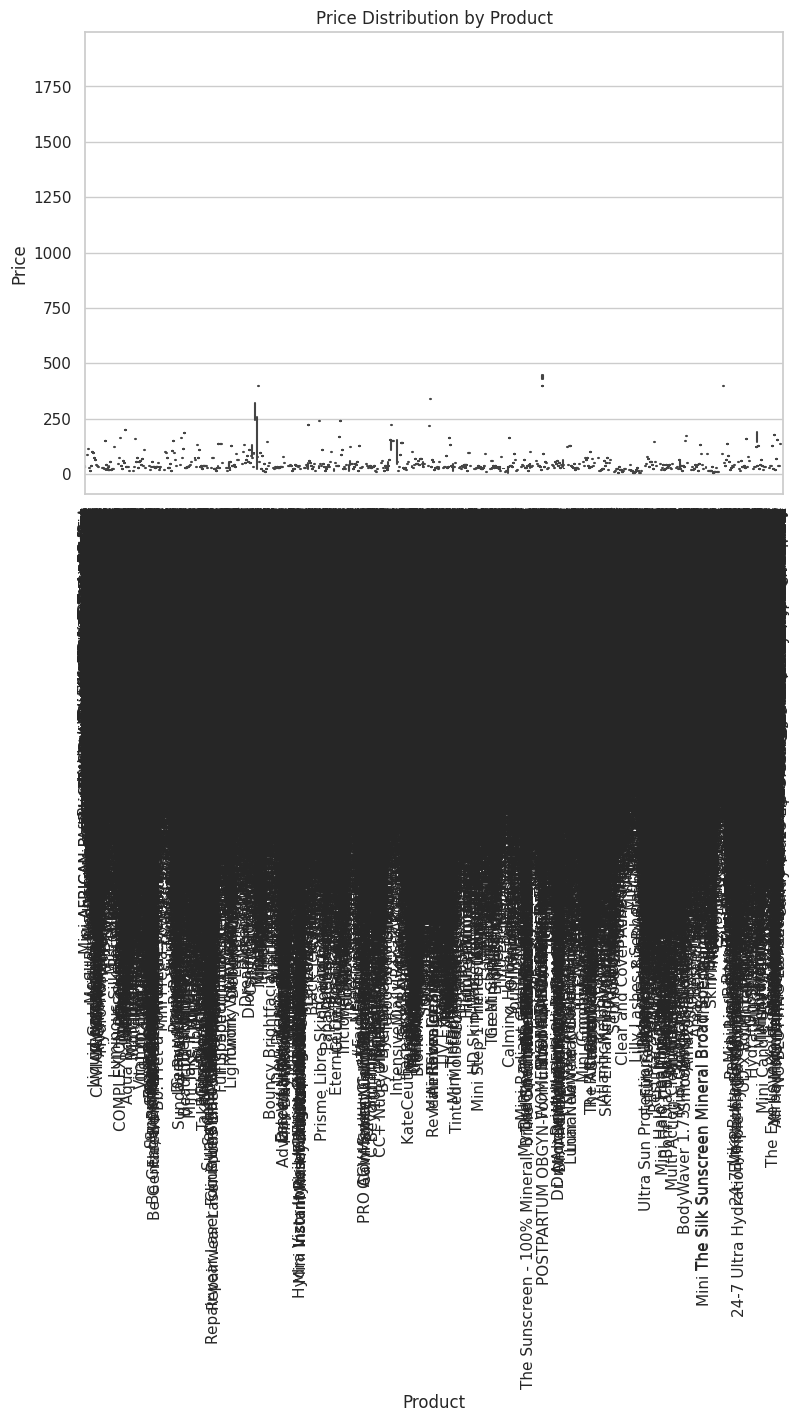

In [ ]:
plt.figure(figsize=(9, 6))
sns.boxplot(x='product_name', y='price_usd', data=sephora_data)
plt.xticks(rotation=90)
plt.xlabel('Product')
plt.ylabel('Price')
plt.title('Price Distribution by Product')
plt.show()


# Step 7: Rating Analysis

In [ ]:
sephora_data['rating'].value_counts()

5.0000    256
4.0000    174
4.5000     82
4.3333     68
3.0000     66
         ... 
4.6954      1
4.2841      1
4.3613      1
4.6878      1
4.6367      1
Name: rating, Length: 4394, dtype: int64

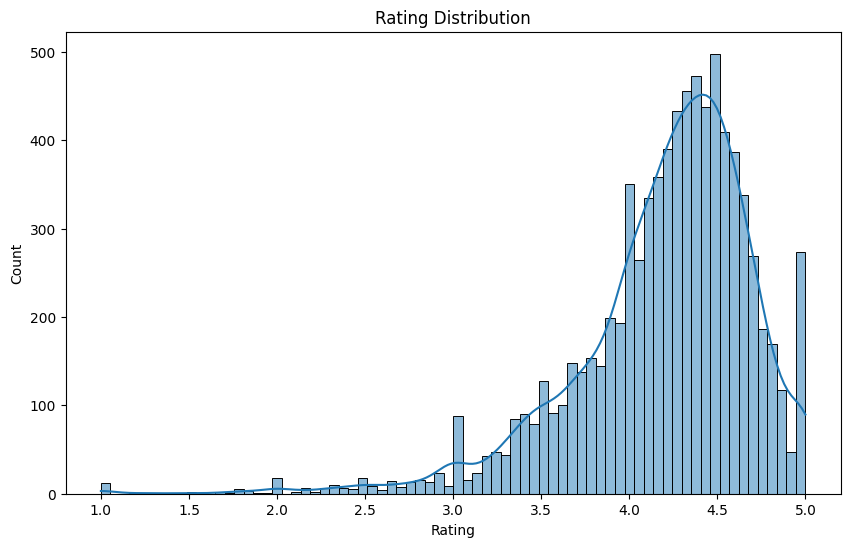

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(sephora_data['rating'], kde=True)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Rating Distribution')
plt.show()


#Step 8 : Analisis multidimensional de variables

In [ ]:
sum_product_name_loves_count= sephora_data.groupby('product_name').sum()['loves_count']


<ipython-input-7-1f70ec1d7f5d>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sum_product_name_loves_count= sephora_data.groupby('product_name').sum()['loves_count']


<Axes: xlabel='product_name'>

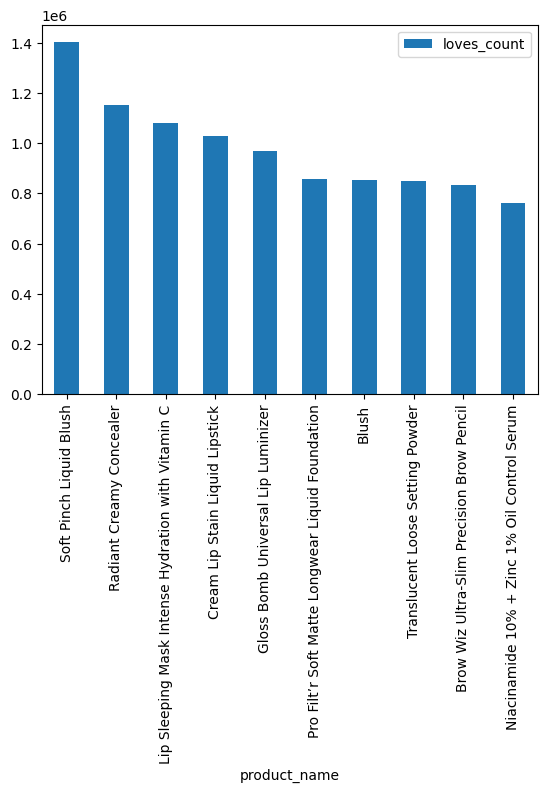

In [ ]:
sum_product_name_loves_count.reset_index().sort_values(by='loves_count', ascending=False).iloc[0:10].plot(kind='bar', x='product_name')

In [ ]:
sum_highlights_rating = sephora_data.groupby('highlights').sum()['rating']

<ipython-input-9-f0e29a65443d>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sum_highlights_rating = sephora_data.groupby('highlights').sum()['rating']


<Axes: xlabel='highlights'>

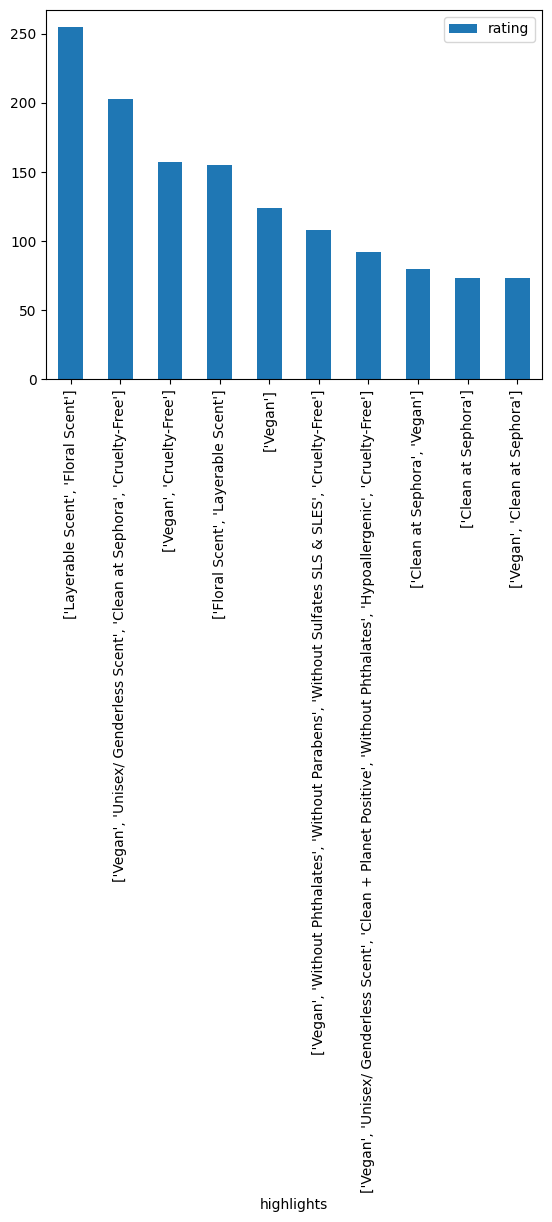

In [ ]:
sum_highlights_rating.reset_index().sort_values(by='rating', ascending=False).iloc[0:10].plot(kind='bar', x='highlights', y='rating')


# Step 9: Correlation Analysis

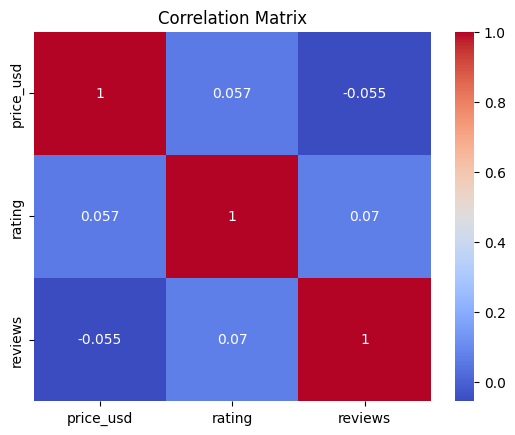

In [ ]:
numeric_cols = ['price_usd', 'rating', 'reviews']
correlation_matrix = sephora_data[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


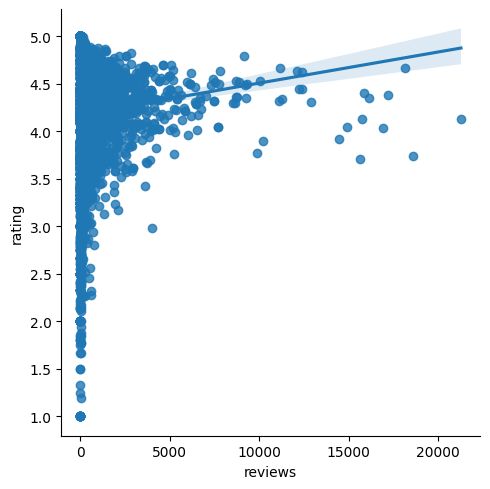

In [ ]:
sns.lmplot(x="reviews", y="rating", data=sephora_data);

# Step 10: Insights and Conclusion

---



In [ ]:
average_price = sephora_data.groupby('rating')['price_usd'].mean()
print('Average Price by Rating:')
print(average_price)


Average Price by Rating:
rating
1.0000    78.166667
1.1905    24.000000
1.2500    75.000000
1.3333    38.000000
1.5000    48.000000
            ...    
4.9818    29.990000
4.9825    35.000000
4.9841    46.000000
4.9937    29.950000
5.0000    61.466758
Name: price_usd, Length: 4394, dtype: float64


In [ ]:
mean_loves_count_highlights = sephora_data.groupby('highlights').mean()['loves_count']

<ipython-input-19-4ad7578551b1>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_loves_count_highlights = sephora_data.groupby('highlights').mean()['loves_count']


<Axes: xlabel='highlights'>

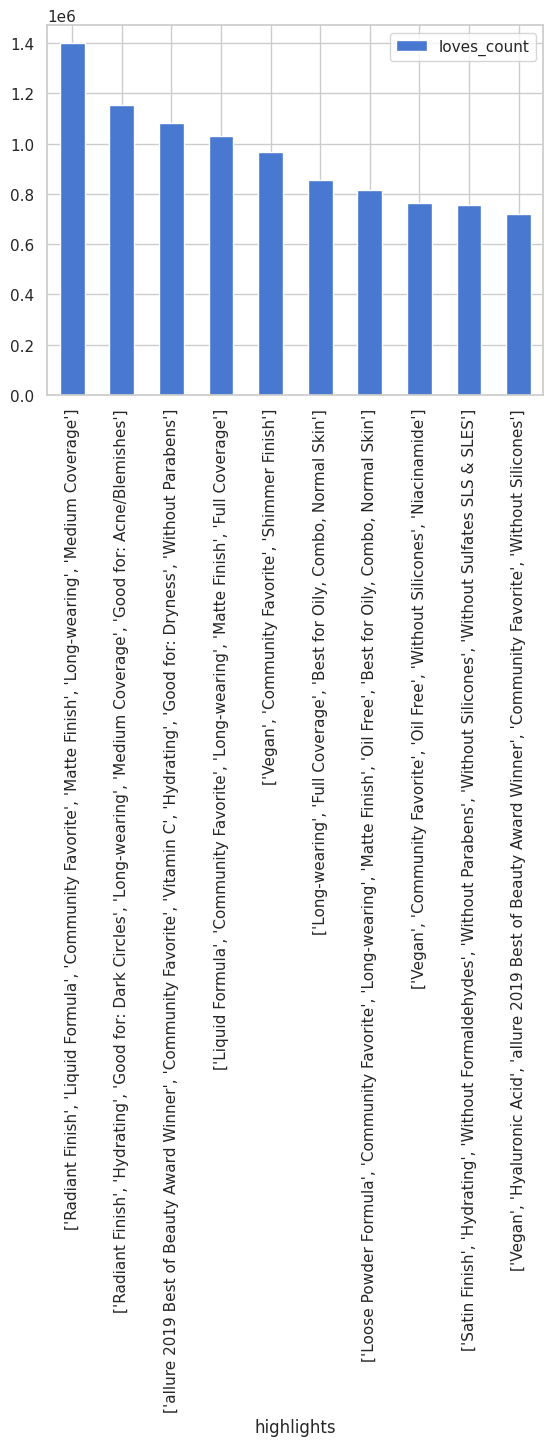

In [ ]:
mean_loves_count_highlights.reset_index().sort_values(by='loves_count', ascending=False).iloc[0:10].plot(kind='bar', x='highlights', y='loves_count')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
mean_loves_count_highlights.reset_index().sort_values(by='loves_count', ascending=False).iloc[0:10]

,highlights,loves_count
2560,"['Radiant Finish', 'Liquid Formula', 'Communit...",1401068.0
2550,"['Radiant Finish', 'Hydrating', 'Good for: Dar...",1153594.0
4347,"['allure 2019 Best of Beauty Award Winner', 'C...",1081315.0
2113,"['Liquid Formula', 'Community Favorite', 'Long...",1029051.0
2990,"['Vegan', 'Community Favorite', 'Shimmer Finish']",968317.0
2187,"['Long-wearing', 'Full Coverage', 'Best for Oi...",856497.0
2217,"['Loose Powder Formula', 'Community Favorite',...",813497.0
2988,"['Vegan', 'Community Favorite', 'Oil Free', 'W...",763168.0
2653,"['Satin Finish', 'Hydrating', 'Without Formald...",757716.0
3462,"['Vegan', 'Hyaluronic Acid', 'allure 2019 Best...",720504.0


In [ ]:
mean_rating_product_name = sephora_data.groupby('product_name').mean()['rating']

<ipython-input-23-2dc60f5a1a7a>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_rating_product_name = sephora_data.groupby('product_name').mean()['rating']


In [ ]:
mean_rating_product_name.reset_index().sort_values(by='rating', ascending=False).iloc[0:10]

,product_name,rating
2048,Dolce Nourishing Shampoo,5.0
1911,DelIKate Try Me Kit,5.0
6637,Sauvage Shaving Gel,5.0
1869,Darker Skin Tones Face Cream,5.0
6639,Sauvage Very Cool Spray,5.0
6647,Scalp Massager Comb,5.0
1856,Daisy Perfume Set,5.0
1855,Daisy Penspray Trio Set,5.0
1819,Daily Defense Mineral Body Lotion SPF 30,5.0
1813,DRx SpectraLite LED EyeCare Max Pro,5.0


In [ ]:
import nltk
nltk.download('stopwords')
  


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
print(stopwords.words('english'))
  

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

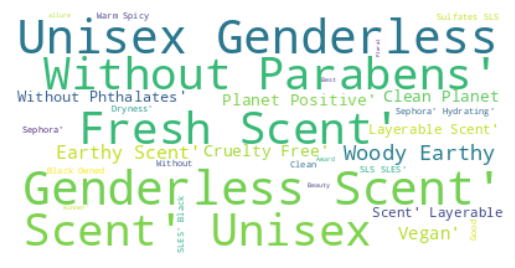

In [ ]:
wc = WordCloud(background_color= 'white')
wc.generate(textos_sephora_data)

plt.axis("off")
plt.imshow(wc, interpolation='bilinear')
plt.show()

# Probar un modelo supervisado

In [ ]:
data = sephora_data.copy()
for i, column in enumerate(list([str(d) for d in data.dtypes])):
    if column == "object":
        data[data.columns[i]] = data[data.columns[i]].fillna(data[data.columns[i]].mode())
        data[data.columns[i]] = data[data.columns[i]].astype("category").cat.codes
    else:
        data[data.columns[i]] = data[data.columns[i]].fillna(data[data.columns[i]].median())



In [ ]:
data.head(5)

,product_id,product_name,loves_count,rating,reviews,price_usd,highlights,primary_category,secondary_category,tertiary_category
0,5201,2645,6320,3.6364,11.0,35.0,2766,1,38,100
1,5199,3720,3827,4.1538,13.0,195.0,2757,1,40,99
2,5193,6213,3253,4.2500,16.0,195.0,2759,1,40,99
3,5191,3655,3018,4.4762,21.0,195.0,2757,1,40,99
4,5189,6149,2691,3.2308,13.0,195.0,2759,1,40,99


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split 

In [ ]:
y = data.pop('reviews')
X = data.copy()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
clf = RandomForestRegressor(n_estimators=1000, max_depth = 4)

In [ ]:
clf.fit(X_train, y_train)

RandomForestRegressor(max_depth=4, n_estimators=1000)

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(y_test, clf.predict(X_test))

0.522491698927102